<a href="https://colab.research.google.com/github/andvar95/MachineLearningClasificadores/blob/master/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
archivos = files.upload()

Saving Archivo.zip to Archivo.zip


Uno GoogleDrive con GitHub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para actualizar el repositorio actualmente se debe borrar el archivo del repositorio y volver a clonarlo

In [ ]:
!rm -rf MachineLearningClasificadores

In [ ]:
!git clone "http://github.com/andvar95/MachineLearningClasificadores.git"

Cloning into 'MachineLearningClasificadores'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 143 (delta 36), reused 118 (delta 20), pack-reused 0
Receiving objects: 100% (143/143), 14.70 MiB | 22.00 MiB/s, done.
Resolving deltas: 100% (36/36), done.


Adicionamos las librerías

In [ ]:
import numpy as np
from math import pow, sqrt
import os 
import skimage
from skimage.color import rgb2hsv 
from skimage import io 
import matplotlib.pyplot as plt

Se crean diccionarios que que contienen cada carpeta y el número de archivos de cada una

In [ ]:
Folders_Name = [{'folders':"wd_Surfaces",'files':2},  
                {'folders':"au_Surfaces",'files':2},
                {'folders':"ww_Surfaces",'files':2}]

Variables para almacenar distintas patrones

In [ ]:

H_energy_T = []
S_energy_T = []
V_energy_T = []
Targets = []


Función para extraer patrones

In [ ]:
def energyHSV(img,etiqueta):
    # Convert BGR to HSV and parse HSV
    hsv_img = rgb2hsv(img)
    h, s, v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
    
    #Get the row and columns 
    r = h.shape[0] 
    c = h.shape[1]
        
    # =============================================================================
    '''  They're Separated every patches of 200x 200 pixels 
          and  Calculate the energy in each HSV Channel '''
    # =============================================================================
        
    for pf in range(0,400,200):
        for pc in range(0,400,200):
            
            
            
            #Get Patches in each channel 
            croop= h[pf:pf+200,pc:pc+200]
            croop1= s[pf:pf+200,pc:pc+200]
            croop2= s[pf:pf+200,pc:pc+200]
            
            
            #Calcuate energy
            H_energy = energyProcess(croop)
            S_energy = energyProcess(croop1)
            V_energy = energyProcess(croop1)
            
            #Histogram 10-bin
            (H_energy,_) = np.histogram(H_energy)
            (S_energy,_) = np.histogram(S_energy)
            (V_energy,_) = np.histogram(S_energy)
            
           
            #Concatenate in every row a feature
            H_energy_T.append(H_energy) 
            S_energy_T.append(S_energy)
            V_energy_T.append(V_energy)
            
            #labels vector
            Targets.append(etiqueta)
            #plt.plot(H_energy)
           
            
            plt.imshow(h[pf:pf+200,pc:pc+200])
            plt.show()
        
    #convert to array
    H_ener = np.array(H_energy_T)
    S_ener = np.array(S_energy_T)
    V_ener = np.array(V_energy_T)
    
    
    #Generating the features matrix
    features = np.concatenate((H_ener,S_ener,V_ener),axis=1)
    
    return features,Targets

In [ ]:
def energyProcess(img):
    
    height = img.shape[0]
    width = img.shape[1]
    pixels = (height-2)*(width-2)
    pixel = 0    
    
    energy_h = [0]*pixels
    
    for j in range(height-2): #external for, height (start in j+1, end in height-2)
        for k in range(width-2): #internal for, width (start in k+1, end in width-2)
                    
        
            x1 = img[j+1][k]
            x2 = img[j+1][k+2]
            y1 = img[j][k+1]
            y2 = img[j+2][k+1]
            
            energy = sqrt(pow((x1-x2),2) + pow((y1-y2),2))
            energy_h[pixel] = energy
            pixel += 1
            
    return energy_h


/content/MachineLearningClasificadores/Images/wd_Surfaces/1


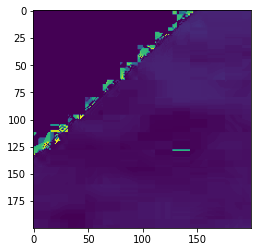

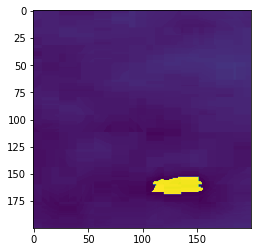

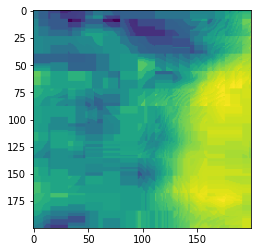

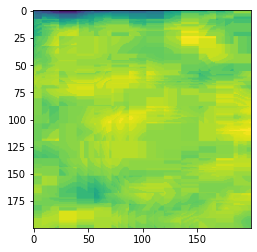

/content/MachineLearningClasificadores/Images/wd_Surfaces/2


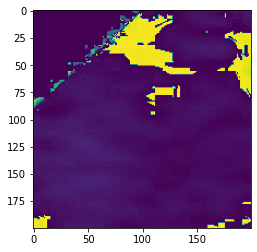

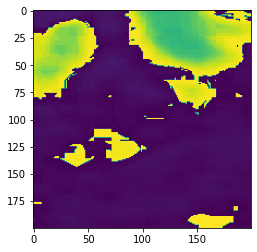

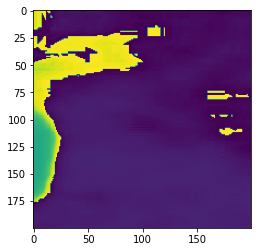

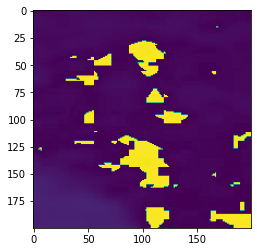

/content/MachineLearningClasificadores/Images/au_Surfaces/1


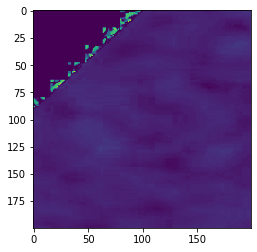

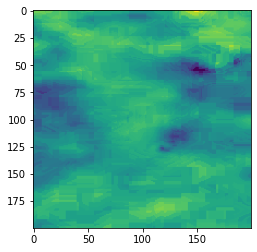

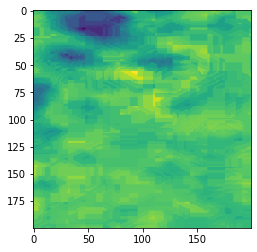

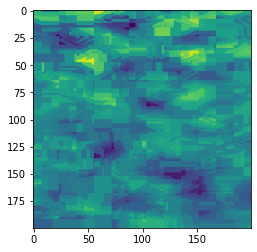

/content/MachineLearningClasificadores/Images/au_Surfaces/2


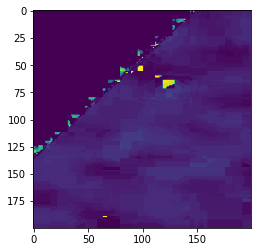

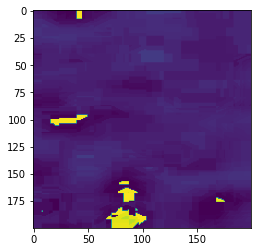

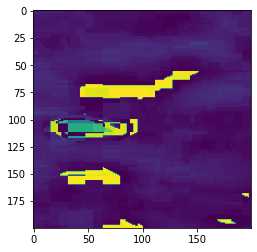

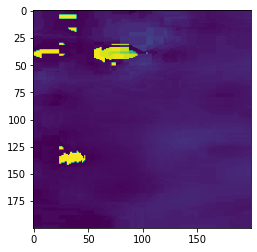

/content/MachineLearningClasificadores/Images/ww_Surfaces/1


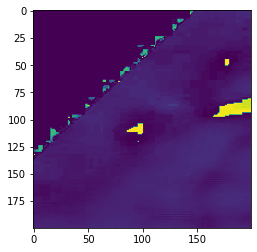

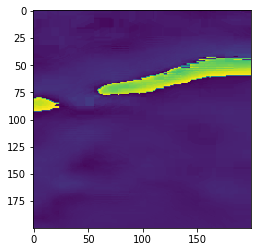

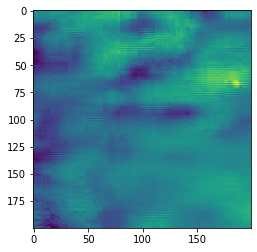

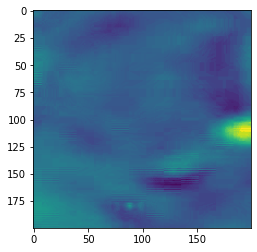

/content/MachineLearningClasificadores/Images/ww_Surfaces/2


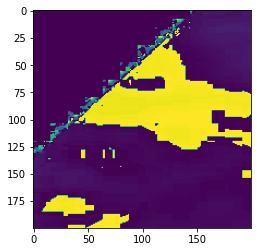

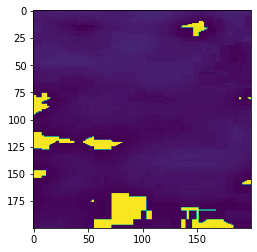

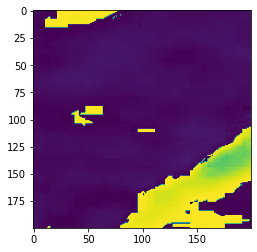

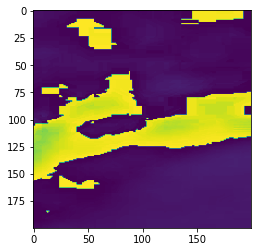

In [ ]:
for folder in range(len(Folders_Name)):
   for file in range(Folders_Name[folder]['files']):
        folder_ = "/content/MachineLearningClasificadores/Images/"+Folders_Name[folder]['folders']
        #print(folder_)
        path_file = os.path.join(folder_,str(file+1))
        print(path_file)
        img = io.imread(path_file+".jpg") 
        feature,targets = energyHSV(img,folder)
        #plt.imshow(img)

In [ ]:
feature, targets

(array([[38096,   107,   143,    64,   227,   120,   320,    39,    26,
            62, 37677,   105,   125,    91,   121,   127,    90,   572,
           138,   158,     9,     0,     0,     0,     0,     0,     0,
             0,     0,     1],
        [38970,     0,     0,     0,     0,     0,    94,    98,     0,
            42, 24900, 10116,  3227,   701,   149,    63,    32,     3,
             5,     8,     7,     1,     0,     0,     1,     0,     0,
             0,     0,     1],
        [26885,  6047,  4072,  1403,   493,   175,    36,    47,    38,
             8, 20962,  9541,  5229,  2233,   807,   280,   105,    33,
            12,     2,     6,     1,     1,     0,     1,     0,     0,
             0,     0,     1],
        [28734,  8304,  1418,   382,   194,   109,    43,    17,     2,
             1, 12239, 13637,  7474,  3255,  1489,   645,   275,   113,
            65,    12,     5,     1,     1,     0,     0,     1,     0,
             0,     1,     1],
        [370